# Notebook for creating features

In [1]:
# creating different features
import numpy as np
import cv2
import pandas as pd
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.feature import local_binary_pattern
from tqdm.auto import tqdm

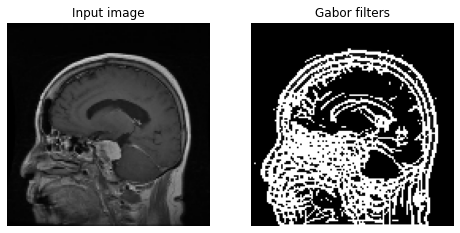

In [3]:
from skimage.filters import gabor
import matplotlib.pyplot as plt
from skimage import io
# GABOR filters
imsize = (128, 128)
image = cv2.imread('./dataset/image/IMAGE_0000.jpg')

def gabor_feature_extraction(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, imsize)
    total = np.zeros(imsize)
    for i in range(16):
        real, imaginary = gabor(image, 0.3, theta=i*90/8)
        total = np.maximum(total, real)
    return total

total = gabor_feature_extraction(image)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cv2.resize(image, imsize), cmap=plt.cm.gray)
ax1.set_title('Input image')


ax2.axis('off')
ax2.imshow(total, cmap=plt.cm.gray)
ax2.set_title('Gabor filters')
plt.show()

In [4]:
# loading in images and turing it into an array to use as features, collecting labels
path = os.getcwd()

path = os.path.join(path, 'dataset')
df_labels = pd.read_csv(os.path.join(path, 'label.csv'))

# getting train and test dataframes
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

classes = {'meningioma_tumor': 0, 'no_tumor': 1, 'glioma_tumor': 2, 'pituitary_tumor': 3}

def feature_extraction(dataset, img_path, name):
    features = []
    gabor_features = []
    labels = []
    for row in tqdm(dataset.iterrows(), total=dataset.shape[0], desc="Progress"):
        image_name = row[1][0]
        label = row[1][1]
        # opening and flattening image
        img = cv2.imread(os.path.join(img_path, image_name))
        gabor_features.append(gabor_feature_extraction(img))
        labels.append(label)
    return gabor_features, labels

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

x_train, y_train = feature_extraction(train, train_path, 'train')
x_test, y_test = feature_extraction(test, test_path, 'test')

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Progress: 100%|██████████| 900/900 [01:48<00:00,  8.27it/s]

Train size:  2100
Test size:  900


In [5]:
x_train

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

In [6]:
np.save('./features/train/gabor_features.npy', x_train)
np.save('./features/test/gabor_features.npy', x_test)

In [8]:
x = np.load('./features/train/gabor_features.npy')

In [12]:
def lbp_feature_selection(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(image, 24, 3, )
    

    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 24 + 3), range=(0, 24 + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    # return the histogram of Local Binary Patterns
    
    return hist

In [13]:
# loading in images and turing it into an array to use as features, collecting labels
path = os.getcwd()

path = os.path.join(path, 'dataset')
df_labels = pd.read_csv(os.path.join(path, 'label.csv'))

# getting train and test dataframes
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

classes = {'meningioma_tumor': 0, 'no_tumor': 1, 'glioma_tumor': 2, 'pituitary_tumor': 3}

def feature_extraction(dataset, img_path, name):
    features = []
    gabor_features = []
    labels = []
    for row in tqdm(dataset.iterrows(), total=dataset.shape[0], desc="Progress"):
        image_name = row[1][0]
        label = row[1][1]
        # opening and flattening image
        img = cv2.imread(os.path.join(img_path, image_name))
        gabor_features.append(lbp_feature_selection(img))
        labels.append(label)
    return gabor_features, labels

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

x_train, y_train = feature_extraction(train, train_path, 'train')
x_test, y_test = feature_extraction(test, test_path, 'test')

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Progress: 100%|██████████| 900/900 [02:28<00:00,  6.07it/s]

Train size:  2100
Test size:  900


In [14]:
np.save('./features/train/lbp_features.npy', x_train)
np.save('./features/test/lbp_features.npy', x_test)

In [2]:
def calculate_hog_features(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog_image = cv2.resize(image, (512, 256), interpolation=cv2.INTER_AREA)
    fd, hog_image = hog(hog_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return fd, hog_image

In [3]:
# loading in images and turing it into an array to use as features, collecting labels
path = os.getcwd()

path = os.path.join(path, 'dataset')
df_labels = pd.read_csv(os.path.join(path, 'label.csv'))

# getting train and test dataframes
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

classes = {'meningioma_tumor': 0, 'no_tumor': 1, 'glioma_tumor': 2, 'pituitary_tumor': 3}

def feature_extraction(dataset, img_path, name):
    features = []
    gabor_features = []
    labels = []
    for row in tqdm(dataset.iterrows(), total=dataset.shape[0], desc="Progress"):
        image_name = row[1][0]
        label = row[1][1]
        # opening and flattening image
        img = cv2.imread(os.path.join(img_path, image_name))
        fd, img = calculate_hog_features(img)
        gabor_features.append(fd)
        labels.append(label)
    return gabor_features, labels

train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')

x_train, y_train = feature_extraction(train, train_path, 'train')
x_test, y_test = feature_extraction(test, test_path, 'test')

print('Train size: ', len(x_train))
print('Test size: ', len(x_test))


Progress: 100%|██████████| 900/900 [01:24<00:00, 10.63it/s]

Train size:  2100
Test size:  900


In [4]:
np.save('./features/train/hog_features.npy', x_train)
np.save('./features/test/hog_features.npy', x_test)

In [21]:
gabor_train = np.load('./features/train/gabor_features.npy')
gabor_test = np.load('./features/test/gabor_features.npy')


hog_train = np.load('./features/train/hog_features.npy', allow_pickle=True)
hog_test = np.load('./features/test/hog_features.npy', allow_pickle=True)

lbp_train = np.load('./features/train/lbp_features.npy')
lbp_test = np.load('./features/test/lbp_features.npy')
print(gabor_train[0].flatten())

x_train = []
x_test = []

for i in tqdm(range(len(gabor_train))):
    features = np.concatenate((hog_train[i], gabor_train[i].flatten(), lbp_train[i]))
    x_train.append(features)

for i in tqdm(range(len(gabor_test))):
    features = np.concatenate((hog_test[i], gabor_test[i].flatten(), lbp_test[i]))
    x_test.append(features)



[0. 0. 0. ... 0. 0. 0.]


100%|██████████| 900/900 [00:00<00:00, 9161.74it/s]


In [22]:
# PCA fitting for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def dimensionality_reduction(x_train, x_test):
    scalar = StandardScaler()

    # scaling data to perform pca on it
    scalar.fit(x_train)

    # applying scale to xtrain and xtest
    x_train = scalar.transform(x_train)
    x_test = scalar.transform(x_test)


    # creating pca
    pca = PCA(.9)

    # fitting pca on training data
    pca.fit(x_train)

    # applying to train and test
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    return x_train, x_test

x_train, x_test = dimensionality_reduction(x_train, x_test)

# creating and training SVM on training data
model_dimension_reduction = SVC(C=1, kernel='linear', gamma='auto')

model_dimension_reduction.fit(x_train, y_train)

# getting accuracy metrics and printing
pred = model_dimension_reduction.predict(x_test)
score = accuracy_score(y_test, pred)
print('accuracy: ', score)

accuracy:  0.4722222222222222
